# DELIVERABLE 2 

## STEP 2: Random data generation

We start by generating points with random coordinates.<br>
The distance matrix is then calculated between each point.<br>
And we end up placing the preceding gener points in a graph that will be saved in a PNG file.

In [115]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.spatial import distance_matrix

#number_cities = 10
#x_max         = 100000    # maximum coordinates of a city on the x axis
#y_max         = 100000    # maximum coordinates of a city on the y axis
#
#coords        = np.random.randint([x_max, y_max], size=(number_cities, 2))  # Creation of a random matrix of city coordinates
#
#print(coords)

number_cities = 1000

'''
Generate city names in alphabetical order
'''
cities = []

for i in range(number_cities):
    city = chr(ord('A') + i)
    cities.append(city)

'''
Origin of the graph
'''
depot_longitude       =  -79.383292
depot_latitude        =  43.652224

'''
Generate random coordinates
'''
longitude = np.random.normal(depot_longitude, 0.1, number_cities)
latitude  = np.random.normal(depot_latitude, 0.1, number_cities)


'''
Generate random demands per cities
'''
demands = np.random.randint(1, 11, number_cities-1)
demands = np.insert(demands,0,0)
print(demands)


'''
Insert coordinates in a matrix
'''
coords  =  []
k       =  0
for citie in range(len(cities)):
    #coords.append([abs(round(longitude[k]*100000)), abs(round(latitude[k]*100000))])
    coords.append([longitude[k], latitude[k]])
    k += 1



print(coords)

[ 0  1  1  1  3  8  7  9 10  9  9 10  9  2  1  1 10 10  5  8 10  9  4  2
 10  6  8  8  1  2  6  8  5  4  6  8  4  4  5  5  4  1  6 10 10 10  8  5
  3  1 10 10  2 10  4 10  5  7  9  4  7  9  9  1  2  3  7  3  1  3  6  8
  8  2  8  4 10  8  1  7  7  3  5  9  1  9  5  2  3  7  7  3  8  1  6  9
  4  1  3  9  4  4  5  4  4  5 10 10  9  8  7  5  5  2  5  9  9  4 10  9
  5  6  5  4  2  4  5  1  5  3  4 10  1  5  6  8  6  4  9  4  5  5  3  9
  3  5  8 10  3  3  7  3  4  1  4  5  7  6  7  9 10  7  2  8  9 10  5  5
  6  1 10 10  8  2 10  6  4  8  6  4  4  2  2  5 10  9  3 10 10  2  4  4
  1  1  4  8  6  2  2  8  3 10  8  6  2  2  3  1  1  8  4  5  5  8  3  7
  3  7  3  6  9 10  1  8  4  7  8 10  7  2  1  4  9 10  8  3  9 10  9 10
  9  8  9  2  9  8  4  7  5  5  4  2  5  5  9  3  5  5  4  6  3 10  2  5
  7  9  1  5  1  9  1  3  7  7  5  6  9  1  6  3  8  8  5  3  3  5  8  2
  5  5  1  8  8 10 10  8  2  5  7  6  1  1  9  7  4  7  2  4  6  5  1  2
  1  2  4  6  4  1  3  1  5  3  3  5  9 10  9 10  3

In [36]:
x, y = coords.T                             # We define that the first value of coords is X and the second is Y
plt.plot(x[0], y[0], c='r', marker='s')
plt.scatter(x[1:],y[1:], c='b')             # Put the x and y axis in pyplot
plt.show()                                  # Display the coordinates of the cities on an orthonormal coordinate system

AttributeError: 'list' object has no attribute 'T'

In [116]:

'''
Generate city names in alphabetical order
'''
cities = []

for i in range(number_cities):
    city = chr(ord('A') + i)
    cities.append(city)

'''
Creation of the matrix of distances between cities
'''

#df       = pd.DataFrame(coords, columns=['xcord', 'ycord'],    index=cities)

df      = pd.DataFrame(coords, columns=['xcord', 'ycord'],    index=cities)
#df     = pd.DataFrame({"longitude":longitude,
#                       "latitude":latitude},  index=cities)

df_map = pd.DataFrame({"longitude":longitude,
                       "latitude":latitude,
                       "demand":demands},  index=cities)
print(df)
print("-------------------------------")
print(df_map)

matrix   = distance_matrix(df.values, df.values)
distance = pd.DataFrame(matrix, index=df.index, columns=df.index)

print(df)
print(distance)

        xcord      ycord
A  -79.518063  43.818283
B  -79.343633  43.535760
C  -79.428881  43.764038
D  -79.221653  43.672245
E  -79.149214  43.712360
..        ...        ...
Ф  -79.328218  43.652521
Х  -79.469271  43.644599
Ц  -79.328952  43.631155
Ч  -79.413759  43.661719
Ш  -79.251125  43.744817

[1000 rows x 2 columns]
-------------------------------
    longitude   latitude  demand
A  -79.518063  43.818283       0
B  -79.343633  43.535760       1
C  -79.428881  43.764038       1
D  -79.221653  43.672245       1
E  -79.149214  43.712360       3
..        ...        ...     ...
Ф  -79.328218  43.652521       5
Х  -79.469271  43.644599       6
Ц  -79.328952  43.631155       6
Ч  -79.413759  43.661719       5
Ш  -79.251125  43.744817       8

[1000 rows x 3 columns]
        xcord      ycord
A  -79.518063  43.818283
B  -79.343633  43.535760
C  -79.428881  43.764038
D  -79.221653  43.672245
E  -79.149214  43.712360
..        ...        ...
Ф  -79.328218  43.652521
Х  -79.469271  43.6445

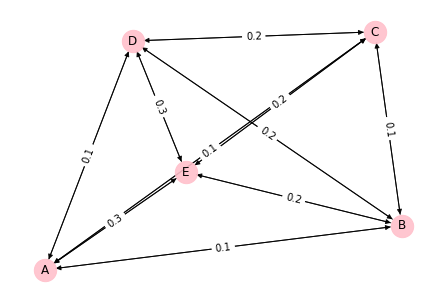

In [89]:
G        = nx.from_numpy_matrix(np.matrix(distance.round(1)), create_using=nx.DiGraph)  # Convert our matrix to a matrix readable by networkx
layout   = nx.spring_layout(G)                                                          # Position the nodes in a plane
labels   = nx.get_edge_attributes(G, "weight")                                          # We recover the weight of the edges

for i in range(number_cities):                                    # Add the name of the cities
    G.add_node(i, desc=cities[i])

node_labels = nx.get_node_attributes(G, 'desc')                   # Get the names of cities
    
nx.draw(G, layout, edge_color='black', width=1, linewidths=1,\
        node_size=500, node_color='pink', alpha=0.9)              # Graph configuration

nx.draw_networkx_labels      (G, pos=layout, labels=node_labels)  # We add the labels of the nodes to the graph
nx.draw_networkx_edge_labels (G, pos=layout, edge_labels=labels)  # We add the labels of the edge to the graph
plt.savefig("Graph.png", format="PNG")                            # We save the graph in a png file
plt.show()                                                        # Display the graph

## <strong> STEP 3: Modeling the problem </strong>

### - Definition of the formal problem

The ADEME wants to find new solutions to regulate and reduce the environmental impact of products deliveries.

For this, our structure CesiCDP must put in place new technologies to optimize the management of resources and the logistics of road traffic. So, we must manage a delivery round thanks to operational research and the VRP (Vehicle Routing Problem) problem.
 
The algorithmic problem therefore consists in calculating a route on a road network making it possible to link a subset of cities together, then to return to its starting point, to minimize the total duration of the tour. This optimization will have to take into account the traffic planned on each axis for the different time slots.

### Mathematical formulation :  

The VRP formulation that we present here corresponds to the mathematical formulation used in linear integer programming. It translates the natural modeling of the problem by the definition of a binary variable Xijk equal to 1 if the vehicle k crosses the arc (Vi, Vj), denoted more simply (i, j).
 
We assume that the graph G = (V, E) is complete, so that all the vertices are connected to each other. This means that a city can be visited from any other city.
  
  
The other constants of the problem are as follows:  
<strong> n </strong> number of clients (or vertices) 
<strong> m </strong> number of vehicles  
<strong> Q </strong> vehicle capacity  
<strong> qi </strong> request from client i  
<strong> Cij </strong> the cost of the edge between vertices i and j (distance or travel time)  

The decision variables of the problem are the <strong> xijk </strong> mentioned above:  
  
<strong> Xijk = 1 if (i, j) </strong> is traveled by vehicle <strong> k </strong>,  
<strong> Xijk = 0 </strong> otherwise.  
 
Thus, as an optimization problem, the VRP is written:

### 1) $\sum \limits _{i=1} ^{n} \sum \limits _{i=1} ^{m} Cij \sum \limits _{i=1} ^{m} Xijk$

<br>

A complete graph with n vertices has n (n − 1) 2 edges:  

### 2)  $\sum \limits _{i=1} ^{n} \sum \limits _{k=1} ^{m} Xijk = 1 ∀ 1 ≤ j ≤ n$

### 3)  $\sum \limits _{j=1} ^{n} \sum \limits _{k=1} ^{m} Xijk = 1 ∀ 1 ≤ i ≤ n$

### 4)  $\sum \limits _{i=1} ^{n} \sum \limits _{l=1} ^{n} Xijk = \sum \limits _{l=1} ^{n}\sum \limits _{j=1} ^{n} Xijk$

### 5)  $\sum \limits _{j=1} ^{n} X0jk = 1 ∀ 1 ≤ k ≤ m$

### 6)  $\sum \limits _{i=1} ^{n} Xi0k = 1 ∀ 1 ≤ k ≤ m$

### 7)  $\sum \limits _{i=1} ^{n} \sum \limits _{j=1} ^{n} Xijk ≤ Q ∀ 1 ≤ k ≤ m$


#### Xijk ∈ 0, 1 ∀ 0 ≤ i, j ≤ n; 1 ≤ k ≤ m

Under this formulation, 
(1) means that the objective of the optimization problem is to minimize the sum of the costs of all the routes.  
The constraints (2) and (3) require that each customer be served once and only once and the constraints (4) ensure flow conservation.  
Constraints (5) ensure that each tour begins and ends at the depot.  
Finally, the constraints (6) are the capacity constraints and the constraints (7) are binary constraints on the Xijk decision variables.
<br>
<br>
**Resources: Synthèse du problème de routage de véhicules - Collection des rapports de recherche de Télécom Bretagne - RR-2011-03-LUSSI**<br>
The document is located in the "Resources" folder.


### - The complexity study of this problem

### Proof that VRP has "at least" the complexity of TSP  

The problem of vehicle tours is NP-Hard.  
  
Since this is not a decision problem (its return type is not bool), it cannot be in NP, although it has decision versions that are.  
  
This problem is a natural generalization of a problem that is already NP Difficult, in particular the traveling salesman problem or TSP. To prove that a problem is NP-Hard, reduces  it to another NP-Hard problem. The TSP is trivially reduced to a VRP instance with an available vehicle.  
  
  
  
### Proof that TSP is NP-Complete  

You have to show two things, that Traveling Salesman (TSP) is in NP and that TSP is NP-Hard. These requirements derive from the definition of NP-Completeness.  

**Part 1: TSP is in NP**

Proof: Let S be an index which is a sequence of vertices V = v1, ..., vn.  
We then check two things, that each edge crossed by adjacent vertices is an edge in G (usually not necessary, since G is traditionally a complete graph), such that the sum of these edge weights is less than or equal to k.  
Second, we check that every vertex of G is in V, which ensures that every node has been crossed. We accept S if and only if S satisfies these two questions, otherwise we reject. These two checks are clearly polynomial, so our algorithm forms a checker with the index S, and TSP is therefore in NP.
  
  
**Part 2: TSP is NP-Hard**


Proof: To show that TSP is NP-Hard, we have to show that any problem y in NP reduces to TSP in polynomial time.  
   
To do this, consider the decisional version of the Hamiltonian cycle (HC). It is well known that HC is NP-Complete, therefore HC is NP-Hard and each "Y" problem in NP reduces to HC in polynomial time. If we reduce HC to TSP in polynomial time, then we will have shown that any "Y" in NP reduced to TSP is a polynomial time, since the sum of two polynomials is also a polynomial.  
  
  
**Recall that the decision version of HC is:**  
Given a graph G = (V, E), is there a simple cycle in G that run through each vertex exactly once?  
Now observe that a simple cycle over n vertices has n edges.  
  
  
  
**Now to reduce HC to TSP use the following algorithm:**  
   
Take G = (V, E), set all edge weights equal to 1, and let k = | V | = n,  k is equal to the number of nodes in G.  
Any edge that is not at the origin in G then receives a weight of 2 (traditionally TSP is on a complete graph, so we have to add these extra edges). Then pass this modified graph in TSP, asking if there is a turn on G with a cost of at most k.  
If the answer to TSP is YES, then HC is YES. Likewise, if TSP is NO, then HC is NO.  
   
Proof: We have to show that the reduction takes a polynomial time and that the solutions of HC correspond 1-1 with the solutions of TSP using the reduction. Obviously, the reduction takes a polynomial time, so we end up with the latter.  
   
First direction: HC has a YES response => TSP has a YES response.   
Proof: If HC has a YES answer, then there exists a simple cycle C which visits each node exactly once, so C has n edges. Since each edge has a weight of 1 in the corresponding TSP instance for the edges that are in the HC graph, there is a round of weight n. Since k = n, and given that there is a round of weight n, it follows that TSP has a YES answer.  
   
Second direction: HC has a NO response => TSP has a NO response. Proof: If HC has an answer NO, then there is no simple cycle C in G that visits each vertex exactly once.  
Now suppose that TSP has a YES response. Then there is a tower that visits each vertex once with a weight of at most k. Since the tour requires that each node be crossed, there are n edges, and since k = n, each edge crossed must have a weight of 1, which implies that these edges are in the graph HC. Then do this round and cross the same edges in the HC instance. This forms a Hamiltonian cycle, a contradiction.  
   
This concludes part 2. Since we have shown that TSP is in both NP and NP-Hard, we have that TSP is NP-Complete, as required.  
  
  
### Conclusion

**Given that VRP is "at least" of the same complexity as TSP and that VRP is not NP. This means that VRP is necessarily NP-hard.**

# WIP: LA SUITE C'EST EN COURS DE REALISATION

# STEP 4 : Algorithmic Modeling

## 1 - Description of the algorithm used to solve VRP

### Why use the ant colony algorithm ?

According to studies carried out to know the best algorithm.  
   
For a little number of nodes:   
     
Taboo search and simulated annealing have better performance than other algorithms. Whether it is on the quality of the solution, the speed of the algorithm but also on the stability of the results, taboo search and simulated annealing have the best performances. It has been noted that the difference in the quality of the solution is particularly visible for larger test cases.  
   
For a case of a large number of nodes: The taboo search and simulated annealing methods give a solution with very similar and powerful differences. But a better result in almost all cases gives the ant colony optimization algorithm.  
 
**Conclusion :**  
The most suitable algorithm is therefore the ant algorithm, because we have a large number of nodes.

**Resources of the two scientific studies :**  
https://dk.upce.cz/bitstream/handle/10195/66616/Comparison%20of%20metaheuristic%20methods%20by%20solving%20travelling%20salesman%20problem.pdf?sequence=1&isAllowed=y <br>
https://www.researchgate.net/publication/312889331_Choice_of_best_possible_metaheuristic_algorithm_for_the_travelling_salesman_problem_with_limited_computational_time_Quality_uncertainty_and_speed

### Explanation of the ant colony algorithm

The original idea comes from the observation of the ant’s exploitation of food resources. Indeed,  although individually having limited cognitive abilities, are collectively able to find the shortest path between a food source and their nest.<br>
 <br>
Biologists have observed, in a series of experiments carried out starting in 1989, that an ant colony having the choice between two paths of unequal length leading to a food source tended to use the shorter path.<br>
A model explaining this behavior is as follows:<br>
 <br>
1.	an ant (called a "scout") roams more or less randomly in the environment around the colony;<br>
2.	if it discovers a source of food, it returns more or less directly to the nest, leaving a trail of pheromones in its path;<br>
3.	these pheromones being attractive, the ants passing nearby will tend to follow, more or less directly, this trail;<br>
4.	returning to the nest, these same ants will reinforce the trail;<br>
5.	if two tracks are possible to reach the same food source, the shorter one will be, at the same time, traveled by more ants than the long one;<br>
6.	the short track will therefore be more and more reinforced, and therefore more and more attractive;<br>
7.	the long track will eventually disappear, the pheromones being volatile;<br>
8.	eventually, all the ants determined and "chose" the shortest trail.<br>
 <br>
 <br>
 <br>
The ant colony algorithm aims to solve the traveling salesman problem, where the goal is to find the shortest path to connect a set of cities.<br>
The general algorithm is relatively simple, and relies on a set of ants, each traveling a path among those possible.<br>
At each step, the ant chooses to move from one city to another according to few rules:<br>
 <br>
•	she can only visit each city once;<br>
•	the further a city is, the less likely it is to be chosen (this is "visibility");<br>
•	the greater the intensity of the pheromone track placed on the ridge between two towns, the more likely the route will be chosen;<br>
•	once its journey is complete, the ant deposits more pheromones on all the edges traveled if the journey is short;<br>
•	the pheromone tracks evaporate with each iteration.<br>

**Resources :** <br>
https://fr.wikipedia.org/wiki/Algorithme_de_colonies_de_fourmis <br>
https://www.i3s.unice.fr/~crescenz/publications/travaux_etude/colonies_fourmis-200605-rapport.pdf <br>
http://villemin.gerard.free.fr/aMaths/Topologi/aaaGraph/Fourmis.htm <br>

## 2 - Python code implementing the model

Now we recover all the information we need for setting up the algorithm.<br>
That is to say :<br>
- The distances matrix<br>
- The total number of car over the 5 days<br>
- The total number of car over the 5 days in the morning and the evenings<br>
- The total number of car per day and by edge<br>
- The total number of car per day and by hours, but also by edge<br>

In [117]:

from pymongo  import MongoClient
import pprint

client                     =  MongoClient('localhost', 27017)
db                         =  client['DataProject']
collection_trafic_stamped  =  db['vehicules_stamped']

'''
Distance Matrix
'''
print(distance)

'''
Total number of cars
'''
total_car  = collection_trafic_stamped.aggregate([{"$group":{"_id":'',"nb_vehicules":{"$sum":'$nb_vehicules'}}},{"$project":{"_id":0,"Total_Vehicules":'$nb_vehicules'}}])
total_car  = list(total_car)[0]

print(total_car)
print("------------------------------------------- \n")
'''
Total number of cars morning and evening
'''
morning_car = 0
evening_car = 0

for x in collection_trafic_stamped.find({}, {"_id":0, "date":1, "nb_vehicules":1}):
    if x["date"].hour < 12:
        morning_car += x["nb_vehicules"]
    else:
        evening_car += x["nb_vehicules"]

print("Morning car number :", morning_car)
print("Evening car number  :", evening_car)
print("------------------------------------------- \n")

           A         B         C         D         E         F         G  \
A   0.000000  0.332032  0.104383  0.330433  0.383757  0.417134  0.279615   
B   0.332032  0.000000  0.243677  0.183050  0.262652  0.134582  0.125286   
C   0.104383  0.243677  0.000000  0.226648  0.284402  0.315250  0.175990   
D   0.330433  0.183050  0.226648  0.000000  0.082805  0.134773  0.075561   
E   0.383757  0.262652  0.284402  0.082805  0.000000  0.184290  0.157422   
..       ...       ...       ...       ...       ...       ...       ...   
Ф   0.252028  0.117775  0.150230  0.108374  0.188741  0.165219  0.034138   
Х   0.180408  0.166226  0.126084  0.249156  0.327151  0.281167  0.175262   
Ц   0.266045  0.096518  0.166264  0.114897  0.197231  0.151783  0.040012   
Ч   0.188127  0.144165  0.103430  0.192393  0.269348  0.239142  0.120131   
Ш   0.276863  0.228610  0.178792  0.078328  0.106955  0.210990  0.103339   

           H         I         J  ...         П         Р         С         Т  \
A   0.

In [40]:
'''
Total number of cars per day
'''
days             =  [1, 2, 3, 4, 5]
dict_total_day_  =  {}

for day in days:
    total_vehicles_day = list(collection_trafic_stamped.aggregate([
        {"$project":{"arete":1, "date":{"$dateToParts": { "date": "$date" }}, "nb_vehicules":1}},
        {"$match":{"date.day":day}}, 
        {"$group":{"_id":"$date.day", 
            "nb_vehicules":{"$sum":"$nb_vehicules"}}}, 
        {"$sort":{"_id": 1}} 
    ]))
    dict_total_day_["total_vehicles_day_%s" % (day)] = total_vehicles_day

'''
Total number of cars per day and per edge
'''
dict_day_  =  {}

for day in days:
    number_vehicles_edge_day = list(collection_trafic_stamped.aggregate([
        {"$project":{"arete":1, "date":{"$dateToParts": { "date": "$date" }}, "nb_vehicules":1}},
        {"$match":{"date.day":day}}, 
        {"$group":{"_id":"$arete", 
            "nb_vehicules":{"$sum":"$nb_vehicules"}}}, 
        {"$sort":{"_id": 1}} 
    ]))
    dict_day_["number_vehicles_day_%s" % (day)] = number_vehicles_edge_day


# print(dict_day_["number_vehicles_day_1"])

In [7]:
pprint.pprint(dict_day_["number_vehicles_day_5"])

[{'_id': 0, 'nb_vehicules': 16841},
 {'_id': 1, 'nb_vehicules': 20009},
 {'_id': 2, 'nb_vehicules': 20384},
 {'_id': 3, 'nb_vehicules': 19057},
 {'_id': 4, 'nb_vehicules': 17320},
 {'_id': 5, 'nb_vehicules': 19243},
 {'_id': 6, 'nb_vehicules': 18148},
 {'_id': 7, 'nb_vehicules': 19917},
 {'_id': 8, 'nb_vehicules': 19137},
 {'_id': 9, 'nb_vehicules': 19035},
 {'_id': 10, 'nb_vehicules': 19299},
 {'_id': 11, 'nb_vehicules': 18398},
 {'_id': 12, 'nb_vehicules': 18372},
 {'_id': 13, 'nb_vehicules': 20019},
 {'_id': 14, 'nb_vehicules': 20369},
 {'_id': 15, 'nb_vehicules': 20779},
 {'_id': 16, 'nb_vehicules': 17958},
 {'_id': 17, 'nb_vehicules': 16579},
 {'_id': 18, 'nb_vehicules': 17247},
 {'_id': 19, 'nb_vehicules': 17890},
 {'_id': 20, 'nb_vehicules': 20821},
 {'_id': 21, 'nb_vehicules': 19203},
 {'_id': 22, 'nb_vehicules': 18369},
 {'_id': 23, 'nb_vehicules': 18375},
 {'_id': 24, 'nb_vehicules': 18758},
 {'_id': 25, 'nb_vehicules': 18923},
 {'_id': 26, 'nb_vehicules': 17551},
 {'_id': 27

In [8]:
'''
Total number of cars per hour and per edge
'''
days        =  [1, 2, 3, 4, 5]
hours       =  [7, 8, 17, 18]
dict_hour_  =  {}

for day in days:
    for hour in hours:
        number_vehicles_edge_hour = list(db.vehicules_stamped.aggregate([
            {"$project":{"arete":1, "date":{"$dateToParts": { "date": "$date" }}, "nb_vehicules":1}},
            {"$match": 
                {"$and": [
                    {"date.hour":{"$lte":(hour+1), "$gte":hour}},
                    {"date.day": day}
                ]}
            }, 
            {"$group":{"_id":"$arete", 
                "nb_vehicules":{"$sum":"$nb_vehicules"}}}, 
            {"$sort":{"_id": 1}} 
            ]))
        
        dict_hour_["number_vehicles_%s_%s" % (day, hour)] = number_vehicles_edge_hour



[{'_id': 0, 'nb_vehicules': 7077}, {'_id': 1, 'nb_vehicules': 6948}, {'_id': 2, 'nb_vehicules': 7503}, {'_id': 3, 'nb_vehicules': 7626}, {'_id': 4, 'nb_vehicules': 7644}, {'_id': 5, 'nb_vehicules': 7814}, {'_id': 6, 'nb_vehicules': 8108}, {'_id': 7, 'nb_vehicules': 8286}, {'_id': 8, 'nb_vehicules': 9033}, {'_id': 9, 'nb_vehicules': 8677}, {'_id': 10, 'nb_vehicules': 7291}, {'_id': 11, 'nb_vehicules': 7029}, {'_id': 12, 'nb_vehicules': 6563}, {'_id': 13, 'nb_vehicules': 7582}, {'_id': 14, 'nb_vehicules': 8505}, {'_id': 15, 'nb_vehicules': 8814}, {'_id': 16, 'nb_vehicules': 8219}, {'_id': 17, 'nb_vehicules': 6832}, {'_id': 18, 'nb_vehicules': 6912}, {'_id': 19, 'nb_vehicules': 7061}, {'_id': 20, 'nb_vehicules': 7991}, {'_id': 21, 'nb_vehicules': 7893}, {'_id': 22, 'nb_vehicules': 6591}, {'_id': 23, 'nb_vehicules': 7484}, {'_id': 24, 'nb_vehicules': 8461}, {'_id': 25, 'nb_vehicules': 8309}, {'_id': 26, 'nb_vehicules': 7272}, {'_id': 27, 'nb_vehicules': 7695}, {'_id': 28, 'nb_vehicules': 7

In [9]:
pprint.pprint(dict_hour_["number_vehicles_2_8"])

[{'_id': 0, 'nb_vehicules': 4523},
 {'_id': 1, 'nb_vehicules': 4425},
 {'_id': 2, 'nb_vehicules': 4928},
 {'_id': 3, 'nb_vehicules': 4586},
 {'_id': 4, 'nb_vehicules': 4913},
 {'_id': 5, 'nb_vehicules': 5141},
 {'_id': 6, 'nb_vehicules': 5545},
 {'_id': 7, 'nb_vehicules': 5497},
 {'_id': 8, 'nb_vehicules': 6167},
 {'_id': 9, 'nb_vehicules': 5778},
 {'_id': 10, 'nb_vehicules': 4796},
 {'_id': 11, 'nb_vehicules': 4645},
 {'_id': 12, 'nb_vehicules': 4224},
 {'_id': 13, 'nb_vehicules': 4995},
 {'_id': 14, 'nb_vehicules': 5379},
 {'_id': 15, 'nb_vehicules': 5770},
 {'_id': 16, 'nb_vehicules': 5329},
 {'_id': 17, 'nb_vehicules': 4306},
 {'_id': 18, 'nb_vehicules': 4519},
 {'_id': 19, 'nb_vehicules': 4699},
 {'_id': 20, 'nb_vehicules': 5200},
 {'_id': 21, 'nb_vehicules': 5163},
 {'_id': 22, 'nb_vehicules': 4312},
 {'_id': 23, 'nb_vehicules': 4627},
 {'_id': 24, 'nb_vehicules': 5522},
 {'_id': 25, 'nb_vehicules': 5688},
 {'_id': 26, 'nb_vehicules': 4409},
 {'_id': 27, 'nb_vehicules': 5319},
 {

## 3 - linear model

We seek to obtain the lower terminal of the optimal solution.<br>
But also the algorithmic bounds.<br>
(We do not take into account the traffic of cars in the calculated terminals).<br>

In [34]:
'''
Lower Bound of the optimal solution
'''



'\nLower Bound of the optimal solution\n'

For the algorithmic bounds, the following functions are used:<br>
<br>
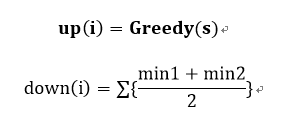
<br>
<br>
For the **upper bound** we use a greedy algorithm.<br>
<br>
The reason why the **lower bound** takes the two minimum values ​​of each row divided by 2 is: <br>
for the city j that passes through each step, from the nearest previous city i to the next nearest city k Go, i.e. j→k. The down obtained in this way must be less than or equal to the optimal solution. Up and down are constantly updated, the value of down will be updated every time a node is reached, and the value of up will be updated every time a solution is found (if it is better than the current up), if the current solution is smaller than the minimum value of all nodes If it is small, the search will be stopped when the optimal solution is found.

In [41]:
'''
Algorithmic - Lower Bound
'''
low  = 0 #lower bound
n    = matrix.shape[0]

for i in range(n):
        
        temp  =  matrix[i].copy()
        temp.sort()

        #print("%s"%(temp[0]))

        low   =  low+temp[0]+temp[1]

low = low / 2

print(low)

0.3306899411724697


In [42]:
'''
Algorithmic - Upper Bound (using greedy algorithm)
'''
INF = 1000000000

up=0

dfs_visited=[False]*n
dfs_visited[0]=True

def dfs(u,k,l):
    if k==n-1 :
        return (l+matrix[u][0])
    minlen=INF
    p=0
    for i in range(n):
        if dfs_visited[i]==False and minlen>matrix[u][i]:
            minlen=matrix[u][i]
            p=i
    dfs_visited[p]=True
    return dfs(p,k+1,l+minlen)
 
def get_up():
    global up
    up=dfs(0,0,0)

get_up()

print(up)

1.1399088484425048


# STEP 5: Implementation and statistical study of experimental behavior

## - The implementation of statistical methods of predictive analysis of traffic on each of the axes of the road network.

In [118]:
'''
On crée une matrice avec le nombre de vehicule par jour et par arete
'''
list_vehicule = []
i = 1

matrix_car_day = [[x['nb_vehicules'] for x in dict_day_[day]] for day in dict_day_]

matrix_car_day = np.transpose(matrix_car_day)
#print(matrix_car_day[300])
print(matrix_car_day)

[[17345 17183 16677 17022 16841]
 [19619 19746 19476 19416 20009]
 [20002 20339 20209 20820 20384]
 ...
 [21596 21560 21330 21916 21783]
 [18296 18258 18438 18463 18682]
 [21359 21589 21970 21800 22064]]


In [136]:
df2   = pd.DataFrame(columns=['day 1', 'day 2', 'day 3', 'day 4', 'day 5'], index=cities)
i     = 0

#for car in matrix_car_day:
    #df2.loc[cities[i]] = car
    #print(cities[i])
    #i += 1

for city in cities:
    if i >= 500:
        i = 0
    df2.loc[city] = matrix_car_day[i]
    
    i += 1

print(df2)

1000
ȵ
    day 1  day 2  day 3  day 4  day 5
A   17345  17183  16677  17022  16841
B   19619  19746  19476  19416  20009
C   20002  20339  20209  20820  20384
D   19596  19210  19193  19261  19057
E   17777  17569  17979  17749  17320
..    ...    ...    ...    ...    ...
Ф   19962  20398  20485  20293  19803
Х   17750  16905  17179  17176  17440
Ц   21596  21560  21330  21916  21783
Ч   18296  18258  18438  18463  18682
Ш   21359  21589  21970  21800  22064

[1000 rows x 5 columns]


In [137]:
import statistics

df3   =  pd.DataFrame(columns=['average car', 'last car'], index=cities)
j     =  0

#for car in matrix_car_day:
#    test                =   [statistics.mean(car[0:4]), car[4]]
#    df3.loc[cities[j]]  =   test
#    j                   +=  1

for city in cities:
    if j >= 500:
        j = 0
    average         =   [statistics.mean(matrix_car_day[j][0:4]), matrix_car_day[j][4]]
    df3.loc[city]   =   average
    j += 1

print(df3)

   average car last car
A        17056    16841
B        19564    20009
C        20342    20384
D        19315    19057
E        17768    17320
..         ...      ...
Ф        20284    19803
Х        17252    17440
Ц        21600    21783
Ч        18363    18682
Ш        21679    22064

[1000 rows x 2 columns]


C:\Users\Thomas\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000019EF1428E20> has a label of '_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Thomas\

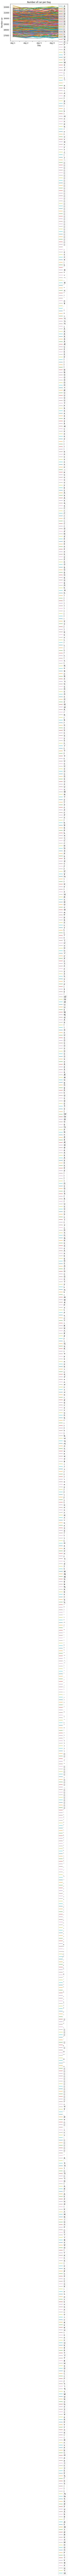

In [138]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
'''
x = np.arange(1, 6)

for day in range(len(matrix_car_day)):
    plt.plot(x, matrix_car_day)

df2   = pd.DataFrame(columns=['day', 'number car'])
'''

df2.T.plot()  
plt.title('Number of car per Day')  
plt.xlabel("Day")
plt.ylabel("Number car") 
plt.show()  

Text(0.5, 0, '5 days')

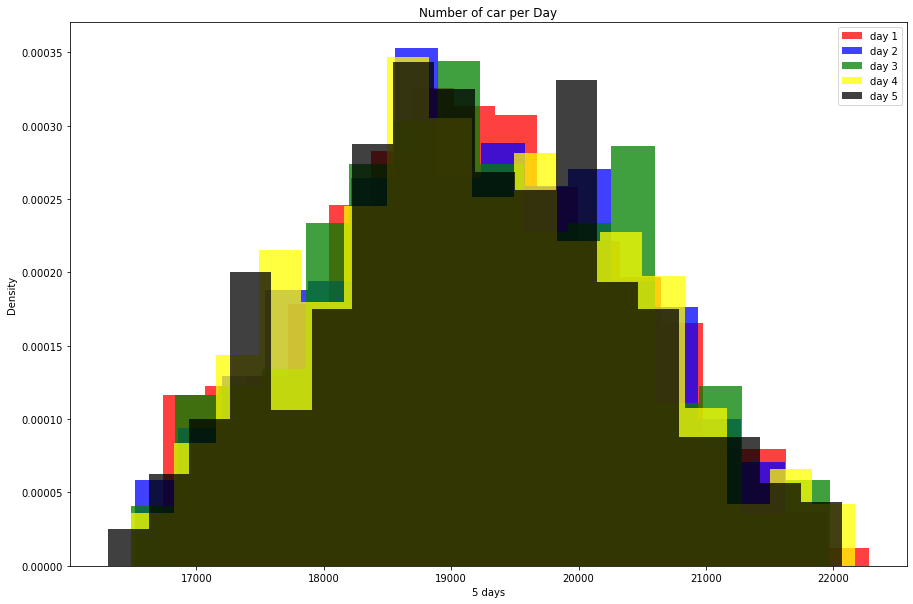

In [139]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.histplot(df2['day 1'], label="day 1", color="red", stat="density", linewidth=0)
seabornInstance.histplot(df2['day 2'], label="day 2", color="blue", stat="density", linewidth=0)
seabornInstance.histplot(df2['day 3'], label="day 3", color="green", stat="density", linewidth=0)
seabornInstance.histplot(df2['day 4'], label="day 4", color="yellow", stat="density", linewidth=0)
seabornInstance.histplot(df2['day 5'], label="day 5", color="black", stat="density", linewidth=0)
plt.title('Number of car per Day')  
plt.legend()
plt.xlabel("5 days")

In [140]:
print(df3)

   average car last car
A        17056    16841
B        19564    20009
C        20342    20384
D        19315    19057
E        17768    17320
..         ...      ...
Ф        20284    19803
Х        17252    17440
Ц        21600    21783
Ч        18363    18682
Ш        21679    22064

[1000 rows x 2 columns]


In [156]:
X = df3['average car'].values.reshape(-1,1)
Y = df3['last car'].values.reshape(-1,1)

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
#regressor.fit(X_train, Y_train) #training the algorithm
regressor.fit(X, Y) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

# variance score: 1 means perfect prediction
#print('Variance score: {}'.format(regressor.score(X_test, Y_test)))
print('Variance score: {}'.format(regressor.score(X, Y)))
print("-------------------------\n\n")

#Y_pred = regressor.predict(X_test)
Y_pred = regressor.predict(X)

#df4 = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df4 = pd.DataFrame({'Actual': Y.flatten(), 'Predicted': Y_pred.flatten()})
df4

[137.3414428]
[[0.99256514]]
Variance score: 0.9470690368595511
-------------------------




,Actual,Predicted
0,16841,17066.532436
1,20009,19555.885802
2,20384,20328.101480
3,19057,19308.737083
4,17320,17773.238814
...,...,...
995,19803,20270.532702
996,17440,17261.075203
997,21783,21576.748423
998,18682,18363.815072


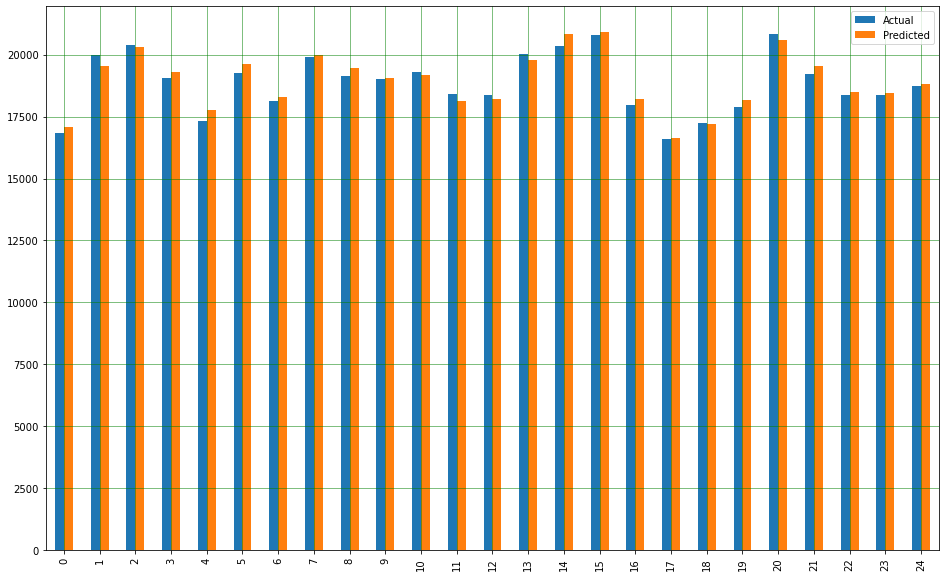

In [142]:
df5 = df4.head(25)
df5.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [61]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

NameError: name 'X_test' is not defined

## - The implementation of the metaheuristic "ant colony algorithm"

In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.spatial import distance_matrix

number_cities = 10

'''
Generate city names in alphabetical order
'''
cities = []

for i in range(number_cities):
    city = chr(ord('A') + i)
    cities.append(city)

'''
Origin of the graph
'''
depot_longitude       =  -79.383292
depot_latitude        =  43.652224

'''
Generate random coordinates
'''
longitude = np.random.normal(depot_longitude, 0.1, number_cities)
latitude  = np.random.normal(depot_latitude, 0.1, number_cities)


'''
Generate random demands per cities
'''
demands = np.random.randint(1, 11, number_cities-1)
demands = np.insert(demands,0,0)
print(demands)


'''
Insert coordinates in a matrix
'''
coords  =  []
k       =  0
for citie in range(len(cities)):
    #coords.append([abs(round(longitude[k]*100000)), abs(round(latitude[k]*100000))])
    coords.append([longitude[k], latitude[k]])
    k += 1



print(coords)
df      = pd.DataFrame(coords, columns=['xcord', 'ycord'],    index=cities)
#df     = pd.DataFrame({"longitude":longitude,
#                       "latitude":latitude},  index=cities)

df_map = pd.DataFrame({"longitude":longitude,
                       "latitude":latitude,
                       "demand":demands},  index=cities)
print(df)
print("-------------------------------")
print(df_map)

In [160]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from time import time


class VPR:

    def __init__(self, capacity, demands, distance_matrix):
        self.n_trucks              =   1                          # Number of trucks
        self.dimension             =   number_cities              # Dimension of the matrix
        self.capacity              =   capacity                   # Capacity for trucks
        self.demands               =   demands                    # List of demands per edge
        self.distance_matrix       =   distance_matrix            # Distance Matrix between edge
        self.distance_matrix_sum   =   distance_matrix.sum()      # Get the sum of all the distance value
        self.final_cost            =   self.distance_matrix_sum   # Final Result / We need a first (worst) value to compare after
        self.final_sol             =   None                       # Final solution of all paths

        self.iterations            =   None                       # Number of iterations
        self.n_ants                =   None                       # Number of ants
        self.alpha                 =   None                       # alpha: exponenet on pheromone, higher alpha gives pheromone more weight
        self.beta                  =   None                       # beta: exponent on distance, higher beta give distance more weight
        self.decay                 =   None                       # decay: Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
        self.init_pheromone_value  =   None                       # Number of pheromone at the start in each edge
        self.pheromone_map         =   None                       # Number of pheromone per edge in a matrix
        self.raw_prob_matrix       =   None                       # Matrix of probability between edge

        self.city_visited          =   None                       # Array of 0 and 1 per city to know if you have been in a city. 0 -> visited and 1 -> not visited.
        self.city_visited_sum      =   None                       # Number of visited cities
        self.capacity_left         =   None                       # Capacity left in a truck

    def get_probality(self, raw_prob_list):
        prob_list = raw_prob_list/raw_prob_list.sum()     # PAS COMPRIS POURQUOI MAIS L AUTRE ALGO FAIT LA MEME CHOSE
        return prob_list

    def get_next_vertex(self, pos):
        potential      =  deepcopy(self.city_visited)                          # Get the visted cities list (0 -> visited and 1 -> not visited.)
        potential_sum  =  self.city_visited_sum                                # Get the number of visited cities
        while potential_sum < self.dimension:                                  # While we have not visited all the cities we continue to search the next one
            raw_prob_list  =  deepcopy(self.raw_prob_matrix[pos]) * potential  # We get the probability of each cities and we remove the cities already visited -
                                                                               # - by multiplying the potential (0 if a city is already visited)
            next_vertex    =  np.random.choice(np.arange(0, self.dimension), p=self.get_probality(raw_prob_list)) # We choose a city randomly by adding the probability per city -
                                                                                                                  # - (0 if already visited thanks to "raw_prob_list")
            if self.demands[next_vertex] <= self.capacity_left:  # Return the selected vertex if the capacity of the truck is sufficient
                return next_vertex
            potential[next_vertex]  =  0        # We remove the top because the demand is too high (we put the value 0 in the list of cities visited)
            potential_sum          +=  1        # We add the list of cities visited by 1 because we deleted the previous city from the list
        return 0                                # Once you have finally removed all the cities from the list. We return 0, that is to say the city of deposit.

    def local_update(self, i, j):      # Used to update the pheromone map and therefore the probability matrix !!! BUT ONLY FOR THE CURRENT CITY (i) AND THE NEXT ONE (j) !!!
        self.pheromone_map[i, j]  += self.decay * self.init_pheromone_value / self.distance_matrix[i, j]           # We update the pheromone map
        self.pheromone_map[j, i]   = self.pheromone_map[i, j]                                                      # We make sure that the pheromone map is symmetrical with respect to the diagonal 
                                                                                                                   # (So that A-B and B-A have the same number of pheromones in the table for example)
        self.raw_prob_matrix[i, j] = self.raw_prob_matrix[j, i] = (self.pheromone_map[i, j] ** self.alpha) * \
                                                                  ((1 / self.distance_matrix[i, j]) ** self.beta)  # We update the probability matrix thanks to the pheromone map (also symmetrically equal)

    def global_update(self, best_solution, best_cost):
        for one_path in best_solution:
            for i in range(len(one_path)-1):
                self.pheromone_map[one_path[i], one_path[i + 1]]    += self.decay * self.capacity / best_cost
                self.pheromone_map[one_path[i + 1], one_path[i]]    =  self.pheromone_map[one_path[i], one_path[i + 1]]
                self.raw_prob_matrix[one_path[i], one_path[i + 1]]  =  \
                    self.raw_prob_matrix[one_path[i + 1], one_path[i]] = \
                    (self.pheromone_map[one_path[i], one_path[i + 1]] ** self.alpha) * \
                    ((1 / self.distance_matrix[one_path[i], one_path[i + 1]]) ** self.beta)

    def get_cost(self, solution):
        current_cost = 0
        for i in range(len(solution) - 1):                                                               # -1 to remove the initial deposit in the loop
            current_cost += self.distance_matrix[solution[i], solution[i + 1]]                           # We add the cost of the current city to the next city
            current_cost = current_cost + (current_cost * (sum([df4['Predicted'][solution[i]], df4['Predicted'][solution[i+1]]])/sum(df4['Predicted']))) # We add to the weight the number of cars (with pourcentage)
        return current_cost

    def plot_function(self):
        box = {'facecolor': 'white',
               'edgecolor': 'black',
               'boxstyle': 'round'}
        plt.figure(figsize=(9.5, 6))
        plt.text(self.iterations - 18, self.show_iteration[4] - 60,
                 f'cost={round(self.final_cost, 2)}, \n'
                 f'iterations={self.iterations}, \n'
                 f'n_ants={self.n_ants}, \n'
                 f'alpha={self.alpha}, \n'
                 f'beta={self.beta}, \n'
                 f'decay={self.decay}, \n'
                 f'init_ph={self.init_pheromone_value}',
                 bbox=box, color='black', fontsize=12)
        plt.plot(np.arange(self.iterations), self.show_cost, 'r')
        plt.plot(np.arange(self.iterations), self.show_iteration, 'k')
        plt.grid()
        plt.title(f'Fitness function for A-n{self.dimension}-k{self.n_trucks}', fontsize=18)
        plt.xlabel('iterations')
        plt.ylabel('cost')
        plt.show()

    def compute(self, iterations, n_ants, alpha, beta, decay, init_pheromone):
        self.iterations            =  iterations
        self.n_ants                =  n_ants
        self.alpha                 =  alpha
        self.beta                  =  beta
        self.decay                 =  decay
        self.init_pheromone_value  =  init_pheromone

        self.pheromone_map         =  np.full(shape=(self.dimension, self.dimension), fill_value=self.init_pheromone_value) # We create a matrix between all the points with the number of pheromones
        np.fill_diagonal(self.pheromone_map, 0)

        np.fill_diagonal(self.distance_matrix, np.inf)

        self.raw_prob_matrix = (self.pheromone_map ** self.alpha) * ((1 / self.distance_matrix) ** self.beta)  # We create the probability matrix between each point using the formula [METTRE LE NOM DE LA FORMULE]

        self.show_iteration  =  []
        self.show_cost       =  []
        for iteration in range(self.iterations):
            time_s         = time()            # CHANGER LE TIMER ET LE METTRE AU DEBUT
            best_solution  = None
            best_cost      = self.distance_matrix_sum                    # We initialize with the worst case, the addition of the distance matrix
            for ant in range(self.n_ants):
                current_state           =   0                            # We initialize the position by the deposit as the start
                solutions               =   []                           # Matrix of the solution found by this ant (Addition of one_path_solution)
                one_path_solution       =   [0]                          # Path found for one truck
                self.capacity_left      =   self.capacity                # We initialize the remaining capacity by the basic capacity of a truck
                self.city_visited       =   np.ones(self.dimension)      # We initialize the list of cities visited by only 1 (0 -> visited and 1 -> not visited)
                self.city_visited[0]    =   0                            # We set the first value to 0 (the deposit)
                self.city_visited_sum   =   1                            # We initialize the number of city visited to 1
                while self.city_visited_sum < self.dimension:            # While we have not visited all the cities we start over
                    next_state = self.get_next_vertex(current_state)     # Get the next vertex (city)
                    if next_state == 0:                                  # "get_next_vertex" returns 0 if that there is no possible city
                        one_path_solution.append(0)                      # We add the depot city (0) at the end of the solution
                        solutions.append(one_path_solution)              # We add the path found (for one truck) to the final solution
                        one_path_solution   =  [0]                       # We delete the path and we put back 0 (the city of deposit). IT'S A NEW PATH (another truck)
                        current_state       =  0                         # We put the city where we are by the depot like the beginning
                        self.capacity_left  =  self.capacity             # We restore the basic capacity of the truck.
                        continue
                    one_path_solution.append(next_state)                 # We add the city previously found to the path
                    self.capacity_left -= self.demands[next_state]       # We remove the demand of the city in the capacity of the truck
                    self.local_update(current_state, next_state)         # We update the pheromone map and therefore the probability matrix
                    current_state                     =  next_state      # We change the city where we are located by the next city (previously selected)
                    self.city_visited[current_state]  =  0               # We put the city where we just moved in the list of visited cities (The 0 value)
                    self.city_visited_sum            +=  1               # +1 to the number of cities visited
                
                one_path_solution.append(0)                              # We add the city of deposit at the end of the path
                solutions.append(one_path_solution)                      # We add the path found to the solution
                cost = sum([self.get_cost(sol) for sol in solutions])    # We calculate the cost of the paths found and add them up
                assert all(np.unique(np.hstack(solutions)) == np.arange(self.dimension))  # 

                if cost < best_cost:                     # If the cost of the solution is lower than the cost of the BEST solution,
                    best_cost      =  cost               # the best solution is replaced by the solution found previously
                    best_solution  =  solutions

            self.global_update(best_solution, best_cost)  #
            self.show_iteration.append(best_cost)         #

            if self.final_cost > best_cost:               # If the final cost is higher than the best cost (this is necessarily the case)
                self.final_cost  =  best_cost             # We recover the best solution and its cost in the final solution
                self.final_sol   =  best_solution
                self.show_cost.append(self.final_cost)  
            else:
                self.show_cost.append(self.show_cost[-1])
            # print(f'Iterations: {iterations} | time: {round(time() - time_s, 4)}| best cost: {best_cost}')

        self.final_sol = [(np.array(x) + 1).tolist() for x in self.final_sol]
        self.n_trucks  = len(self.final_sol)

In [161]:
capacity    =  100

case = VPR(capacity, demands, matrix)
case.compute(iterations=100, n_ants=10, alpha=1, beta=1, decay=0.95, init_pheromone=1000)
print("Number of car: ", case.n_trucks)

print("Found solution:", case.final_sol)

print("Final Cost:", case.final_cost)

In [65]:
plt.scatter(x[0], y[0], c='r', marker='s')
plt.scatter(x[1:], y[1:])
col = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
i   = 0

for truck in final_path:
    for test in range(len(truck)-1):
        dot1 = truck[test]-1
        dot2 = truck[test+1]-1
        print("Couple : ", dot1, dot2)
        plt.plot([x[dot1], x[dot2]], [y[dot1], y[dot2]], c=col[(i) % len(col)])
    i += 1
    print("---------------------")
plt.show

KeyError: 0

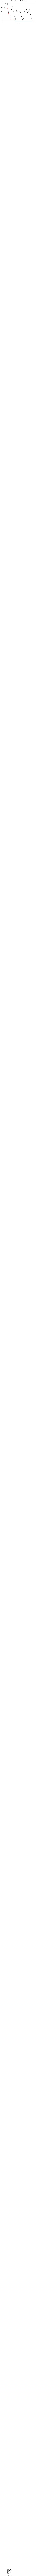

In [68]:
case.plot_function()

In [69]:
import folium
m = folium.Map(location=[43.652597, -79.384669], tiles="CartoDB positron" , zoom_start=10)

for index, row in df_map.iterrows():
    icon_house = "circle"
    color      = "blue"
    if index == "A":
        icon_house = "home"
        color      = "red"
    popup_demand = "Demand: " + str(row['demand'])
    folium.Marker(location=[row['latitude'], row['longitude']], tooltip="click for more", popup = popup_demand, icon=folium.Icon(color=color ,icon=icon_house, prefix='fa')).add_to(m)
m

In [70]:
col = ['blue', 'green', 'red', 'pink', 'orange', 'yellow', 'black', 'brown']
i   = 0

final_path = case.final_sol

for truck in final_path:
    for test in range(len(truck)-1):
        dot1 = truck[test]-1
        dot2 = truck[test+1]-1
        dot1_loc = df_map.iloc[dot1]
        dot2_loc = df_map.iloc[dot2]
        

        line = [(dot1_loc['latitude'],dot1_loc['longitude']), (dot2_loc['latitude'],dot2_loc['longitude'])]
        
        folium.PolyLine(line,
                color=col[(i) % len(col)],
                weight=5,
                opacity=0.8).add_to(m)
    i += 1

m

revenir au stock si ca coute moins chere d'aller dans la ville et prendre un autre camion

## - Statitistics

### - Statistique Descriptive

### - Regression lineaire

# nulllll nuulllllll dimitri !!!

In [105]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice
import time

class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
        Example:
            ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            #print (shortest_path)
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path            
            self.pheromone = self.pheromone * self.decay            
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started    
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move

car_number                       =  2
distance_ant                     =  matrix
distance_ant[distance_ant == 0]  =  np.inf


ant_colony     =  AntColony(distance_ant, 10, 1, 100, 0.95, alpha=1, beta=1)
t0             =  time.time()


for truck in range(car_number):
    print("truck")

shortest_path  =  ant_colony.run()


t1             =  time.time()
total_time     =  t1-t0

print ("shorted_path: {}".format(shortest_path))
print("\n\n Total time: {}".format(total_time))

truck
truck
shorted_path: ([(0, 6), (6, 2), (2, 5), (5, 9), (9, 4), (4, 3), (3, 1), (1, 7), (7, 8), (8, 0)], 313630.56260488764)


 Total time: 0.6400094032287598


<function matplotlib.pyplot.show(close=None, block=None)>

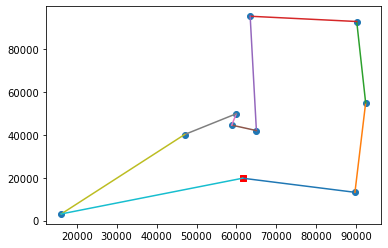

In [106]:
plt.scatter(x[0], y[0], c='r', marker='s')
plt.scatter(x[1:], y[1:])

for test in shortest_path[0]:
    plt.plot([x[test[0]], x[test[1]]],[y[test[0]], y[test[1]]])

plt.show

In [52]:
import  random                     as rn
from    numpy.random import choice as np_choice

def AntColony(distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
    """
    Args:
        distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
        n_ants (int): Number of ants running per iteration
        n_best (int): Number of best ants who deposit pheromone
        n_iteration (int): Number of iterations
        decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
        alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
        beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
    Example:
        ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
    """
    
    pheromone              = np.ones(distances.shape) / len(distances)
    all_inds               = range(len(distances))
    shortest_path          = None
    all_time_shortest_path = ("placeholder", np.inf)
    
    
    for i in range(n_iterations):
        all_paths = gen_all_paths(n_ants, pheromone, alpha, beta, all_inds)
        spread_pheronome(all_paths, n_best, pheromone, shortest_path=shortest_path)
        shortest_path = min(all_paths, key=lambda x: x[1])
        #print (shortest_path)
        if shortest_path[1] < all_time_shortest_path[1]:
            all_time_shortest_path = shortest_path            
        pheromone = pheromone * decay            
    return all_time_shortest_path
    
def spread_pheronome(all_paths, n_best, pheromone, shortest_path):
    sorted_paths = sorted(all_paths, key=lambda x: x[1])
    for path, dist in sorted_paths[:n_best]:
        for move in path:
            pheromone[move] += 1.0 / distances[move]

def gen_path_dist(path):
    total_dist = 0
    for ele in path:
        total_dist += distances[ele]
    return total_dist

def gen_all_paths(n_ants, pheromone, alpha, beta, all_inds):
    all_paths = []
    for i in range(n_ants):
        path = gen_path(0, pheromone, alpha, beta, all_inds)
        all_paths.append((path, gen_path_dist(path)))
    return all_paths

def gen_path(start, pheromone, alpha, beta, all_inds):
    path    = []
    visited = set()
    visited.add(start)
    prev    = start
    
    for i in range(len(distances) - 1):
        move = pick_move(pheromone[prev], distances[prev], visited, alpha, beta, all_inds)
        path.append((prev, move))
        prev = move
        visited.add(move)
    path.append((prev, start)) # going back to where we started    
    return path

def pick_move(pheromone, dist, visited, alpha, beta, all_inds):
    pheromone = np.copy(pheromone)
    pheromone[list(visited)] = 0

    row      = pheromone ** alpha * (( 1.0 / dist) ** beta)

    norm_row = row / row.sum()
    move     = np_choice(all_inds, 1, p=norm_row)[0]
    return move


number_of_ants                   =  2
distance_ant                     =  distance_matrix(df.values, df.values)
distance_ant[distance_ant == 0]  =  np.inf

print(distance_ant)

shortest_path               =  AntColony(distance_ant, number_of_ants, 20, 100, 0.95, alpha=1, beta=1)

print ("shorted_path: {}".format(shortest_path))

[[            inf  26863.32179757  37557.97818041  73815.67108684
   30069.07635761]
 [ 26863.32179757             inf  26923.05526867 100365.40290359
   52862.61462508]
 [ 37557.97818041  26923.05526867             inf  99797.05038226
   67615.70542411]
 [ 73815.67108684 100365.40290359  99797.05038226             inf
   61130.82385344]
 [ 30069.07635761  52862.61462508  67615.70542411  61130.82385344
              inf]]


NameError: name 'distances' is not defined